<a href="https://colab.research.google.com/github/krikorantranik/Private/blob/main/QuickSupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is simply a snippet of code to perform a supervised classification on a dataset that is ready for a classification task. It doesn't have to be binary, but for the purpose of the example it was quicker.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.utils import resample
import joblib
import matplotlib.pyplot as plt

Retrieve the dataset. In this case I decided to use the Oil Spill dataset, even if it "cryptic" in its nature, it fits well for this sample, it is all numeric, little to no missing values and has a binary output

In [2]:
queriesDS = fetch_openml(data_id=311, as_frame=True, parser='auto')
print(queriesDS.DESCR)
print(queriesDS.feature_names)
print(queriesDS.target_names)
dataset = queriesDS.data
target = queriesDS.target
dataset

**Author**:   
  
**Source**: Unknown -   
**Please cite**:   

Oil dataset

Past Usage:
1. Kubat, M., Holte, R.,

Downloaded from openml.org.
['attr1', 'attr2', 'attr3', 'attr4', 'attr5', 'attr6', 'attr7', 'attr8', 'attr9', 'attr10', 'attr11', 'attr12', 'attr13', 'attr14', 'attr15', 'attr16', 'attr17', 'attr18', 'attr19', 'attr20', 'attr21', 'attr22', 'attr23', 'attr24', 'attr25', 'attr26', 'attr27', 'attr28', 'attr29', 'attr30', 'attr31', 'attr32', 'attr33', 'attr34', 'attr35', 'attr36', 'attr37', 'attr38', 'attr39', 'attr40', 'attr41', 'attr42', 'attr43', 'attr44', 'attr45', 'attr46', 'attr47', 'attr48', 'attr49']
['class']


,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr40,attr41,attr42,attr43,attr44,attr45,attr46,attr47,attr48,attr49
0,1,2558,1506.09,456.63,90,6395000.0,40.88,7.89,29780.0,0.19,...,69,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95
1,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,...,69,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26
2,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,...,69,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84
3,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,...,69,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07
4,5,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,...,69,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,200,12,92.42,364.42,135,97200.0,59.42,10.34,884.0,0.17,...,50,381.84,254.56,84.85,146.97,4.50,0,2593.50,65.85,6.39
933,201,11,98.82,248.64,159,89100.0,59.64,10.18,831.0,0.17,...,50,284.60,180.00,150.00,51.96,1.90,0,4361.25,65.70,6.53
934,202,14,25.14,428.86,24,113400.0,60.14,17.94,847.0,0.30,...,50,402.49,180.00,180.00,0.00,2.24,0,2153.05,65.91,6.12
935,203,10,96.00,451.30,68,81000.0,59.90,15.01,831.0,0.25,...,50,402.49,180.00,90.00,73.48,4.47,0,2421.43,65.97,6.32


Since most of the datasets in real life are one table, I am going to put the target at the end of original dataset and make it 0 or 1. Also will exclude NA values

In [3]:
dataset['target'] = target
dataset['target'] = dataset['target'].replace(['-1', '1'],[0, 1])
dataset = dataset.dropna()
dataset

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr41,attr42,attr43,attr44,attr45,attr46,attr47,attr48,attr49,target
0,1,2558,1506.09,456.63,90,6395000.0,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,200,12,92.42,364.42,135,97200.0,59.42,10.34,884.0,0.17,...,381.84,254.56,84.85,146.97,4.50,0,2593.50,65.85,6.39,0
933,201,11,98.82,248.64,159,89100.0,59.64,10.18,831.0,0.17,...,284.60,180.00,150.00,51.96,1.90,0,4361.25,65.70,6.53,0
934,202,14,25.14,428.86,24,113400.0,60.14,17.94,847.0,0.30,...,402.49,180.00,180.00,0.00,2.24,0,2153.05,65.91,6.12,0
935,203,10,96.00,451.30,68,81000.0,59.90,15.01,831.0,0.25,...,402.49,180.00,90.00,73.48,4.47,0,2421.43,65.97,6.32,0


Now, I need a fraction of the whole to do a final evaluation with unseen data. So I do a first split. With stratify I ensure that the sets are similar.

In [4]:
outp = train_test_split(dataset, train_size=0.7, stratify=dataset['target'])
finaleval=outp[1]
subset=outp[0]

subset.groupby('target').count().mean(axis=1)

target
0    626.0
1     29.0
dtype: float64

If the data is unbalanced, it might be necessary to rebalance it so that it won't underpredict the positive value. Since I don't want to lose data points I will sample with replacement. I made this small function to take care of the rebalance task.

In [5]:
def rebalance(sset, min, max):
 classes = list(set(sset["target"]))
 a = []
 for clas in classes:
  positives = sset[sset['target']==clas]
  if len(positives) < min:
   positives = resample(positives, n_samples=min, replace=True)
  if len(positives) > max:
   positives = resample(positives, n_samples=max, replace=False)
  a.append(positives)
 rebalanced = pd.concat(a, axis=0, ignore_index=True)
 return rebalanced

Now, on the working subset I separate the factors and response variable

In [15]:
subset = rebalance(sset=subset, min=300, max=300)
subset_y = subset[['target']]
subset_x = subset.drop(columns=['target'])
subset_x

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr40,attr41,attr42,attr43,attr44,attr45,attr46,attr47,attr48,attr49
0,254,54,1292.48,46.94,108,135000.0,27.22,6.32,2130.0,0.23,...,39,632.46,223.61,136.16,58.42,4.65,0,7290.86,65.53,7.85
1,143,69,1729.68,1406.67,62,172500.0,31.57,4.84,1840.0,0.15,...,55,514.78,250.00,202.47,27.53,2.54,0,4043.78,66.26,7.97
2,142,192,1663.45,1041.51,55,480000.0,37.33,8.63,4920.0,0.23,...,55,1400.89,403.11,283.17,77.08,4.95,0,4584.48,66.07,8.02
3,101,21,54.05,366.10,134,170100.0,54.29,12.17,1461.0,0.22,...,50,381.84,254.56,127.28,127.28,3.00,0,2676.31,65.84,6.27
4,8,670,15.12,585.25,125,5427000.0,73.89,12.45,15254.0,0.17,...,73,4269.07,1872.78,1134.59,340.80,3.76,0,3741.34,66.11,5.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1,109,441.43,303.14,18,882900.0,52.11,16.85,7067.0,0.32,...,73,2534.42,853.81,291.60,220.85,8.69,0,27407.50,65.90,7.55
596,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,...,69,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07
597,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,...,69,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07
598,5,57,260.19,1296.07,52,142500.0,40.46,4.33,2000.0,0.11,...,63,960.47,141.42,89.57,41.98,10.72,1,26361.00,65.97,6.30


This is where the core of the snippet. It is a set of algorithms selected by me that I tested against several problems. Of course it is not a "one size fits all" but it is a good approach to start with a suppervised classification problem.

The ideal approach is to start like this, then remove algorithms that are not useful or create noise by trial and error, and teak parameters. Once a preselection is done, then a more complicated approach can be taken (spoiler: it is almost always random forest or neural networks).

In [16]:
def SupervisedClass(x_train, y_train, x_final, run):
 estrf1 = RandomForestClassifier(n_estimators=250,max_features=None)
 estrf = OneVsRestClassifier(estrf1)
 estnn1 = MLPClassifier(max_iter=2000, hidden_layer_sizes=(150,150,150) )
 estnn = OneVsRestClassifier(estnn1)
 estgb1 = GradientBoostingClassifier(n_estimators=100)
 estgb = OneVsRestClassifier(estgb1)
 estkn1 = KNeighborsClassifier(n_neighbors=5)
 estkn = OneVsRestClassifier(estkn1)
 estsv1 = SVC()
 estsv = OneVsRestClassifier(estsv1)
 estgp1 = GaussianProcessClassifier(max_iter_predict=1000)
 estgp = OneVsRestClassifier(estgp1)
 estet1 = ExtraTreesClassifier(n_estimators=100)
 estet = OneVsRestClassifier(estet1)
 estad1 = AdaBoostClassifier(n_estimators=100)
 estad = OneVsRestClassifier(estad1)
 estlr1 = LogisticRegression(C=1.0, solver='saga',  max_iter=10000)
 estlr = OneVsRestClassifier(estlr1)
 estpa1 = PassiveAggressiveClassifier(C=1.0, max_iter=10000, early_stopping=True)
 estpa = OneVsRestClassifier(estpa1)
 estimators = [ ('rf', BaggingClassifier(estimator=estrf, n_estimators=3, bootstrap=True, bootstrap_features=True, n_jobs=1) ),
            ('nn', BaggingClassifier(estimator=estnn, n_estimators=3, bootstrap=True, bootstrap_features=True, n_jobs=1) ),
            ('gb',BaggingClassifier(estimator=estgb, n_estimators=3, bootstrap=True, bootstrap_features=True, n_jobs=1) ),
            ('kn',BaggingClassifier(estimator=estkn, n_estimators=3, bootstrap=True, bootstrap_features=True, n_jobs=1) ),
            ('sv',BaggingClassifier(estimator=estsv, n_estimators=3, bootstrap=True, bootstrap_features=True, n_jobs=1) ),
            ('gp',BaggingClassifier(estimator=estgp, n_estimators=3, bootstrap=True, bootstrap_features=True, n_jobs=1) ),
            ('et',BaggingClassifier(estimator=estet, n_estimators=3, bootstrap=True, bootstrap_features=True, n_jobs=1) ),
            ('ad',BaggingClassifier(estimator=estad, n_estimators=3, bootstrap=True, bootstrap_features=True, n_jobs=1) ),
            ('lr',BaggingClassifier(estimator=estlr, n_estimators=3, bootstrap=True, bootstrap_features=True, n_jobs=1) ),
            ('pa',BaggingClassifier(estimator=estpa, n_estimators=3, bootstrap=True, bootstrap_features=True, n_jobs=1) ),
  ]
 clf = StackingClassifier(estimators=estimators, stack_method='predict_proba', final_estimator=RandomForestClassifier(n_estimators=200,max_features=None))
 x_train1, x_score, y_train1, y_score = train_test_split(x_train, y_train, test_size=0.2)
 modscore = clf.fit(x_train1, y_train1).score(x_score, y_score)
 probs = pd.DataFrame(clf.predict_proba(x_final), columns=clf.classes_)
 modelname = "supervised_" + str(run)
 joblib.dump(clf, modelname)
 return probs, modscore


def modeling(x_train, y_train, x_final, y_final):
 run = 1
 probs1, score1 = SupervisedClass(x_train = x_train.to_numpy(),
                         y_train = y_train.to_numpy().ravel(),
                         x_final = x_final.to_numpy(),
                         run = run)
 run = run + 1
 probs2, score2 = SupervisedClass(x_train = x_train.to_numpy(),
                         y_train = y_train.to_numpy().ravel(),
                         x_final = x_final.to_numpy(),
                         run = run)
 run = run + 1
 probs3, score3 = SupervisedClass(x_train = x_train.to_numpy(),
                         y_train = y_train.to_numpy().ravel(),
                         x_final = x_final.to_numpy(),
                         run = run)
 run = run + 1
 probs4, score4 = SupervisedClass(x_train = x_train.to_numpy(),
                         y_train = y_train.to_numpy().ravel(),
                         x_final = x_final.to_numpy(),
                         run = run)
 run = run + 1
 probs5, score5 = SupervisedClass(x_train = x_train.to_numpy(),
                         y_train = y_train.to_numpy().ravel(),
                         x_final = x_final.to_numpy(),
                         run = run)
 avgprobsM = pd.concat([probs1, probs2, probs3, probs4, probs5]).groupby(level=0).mean()
 avgprobsM["A"] = y_final.to_numpy().ravel()
 avgprobsM["P"] = np.where(avgprobsM[1]>=0.1,1,0)
 avgprobsM["Hit"]=np.where(avgprobsM["P"]==avgprobsM["A"],1,0)
 o1 = sum(avgprobsM["Hit"]/len(avgprobsM))
 avgprobsM["P"] = np.where(avgprobsM[1]>=0.25,1,0)
 avgprobsM["Hit"]=np.where(avgprobsM["P"]==avgprobsM["A"],1,0)
 o2 = sum(avgprobsM["Hit"]/len(avgprobsM))
 avgprobsM["P"] = np.where(avgprobsM[1]>=0.35,1,0)
 avgprobsM["Hit"]=np.where(avgprobsM["P"]==avgprobsM["A"],1,0)
 o3 = sum(avgprobsM["Hit"]/len(avgprobsM))
 avgprobsM["P"] = np.where(avgprobsM[1]>=0.5,1,0)
 avgprobsM["Hit"]=np.where(avgprobsM["P"]==avgprobsM["A"],1,0)
 o4 = sum(avgprobsM["Hit"]/len(avgprobsM))
 avgprobsM["P"] = np.where(avgprobsM[1]>=0.65,1,0)
 avgprobsM["Hit"]=np.where(avgprobsM["P"]==avgprobsM["A"],1,0)
 o5 = sum(avgprobsM["Hit"]/len(avgprobsM))
 avgprobsM["P"] = np.where(avgprobsM[1]>=0.75,1,0)
 avgprobsM["Hit"]=np.where(avgprobsM["P"]==avgprobsM["A"],1,0)
 o6 = sum(avgprobsM["Hit"]/len(avgprobsM))
 avgprobsM["P"] = np.where(avgprobsM[1]>=0.9,1,0)
 avgprobsM["Hit"]=np.where(avgprobsM["P"]==avgprobsM["A"],1,0)
 o7 = sum(avgprobsM["Hit"]/len(avgprobsM))
 scores = pd.DataFrame([['10%', o1], ['25%', o2], ['35%', o3], ['50%', o4], ['65%', o5], ['75%', o6], ['90%', o7]], columns=['cut', 'score'])
 return scores

We split the subset in training and validation to feed the models

In [17]:
subtrain_x, subtest_x, subtrain_y, subtest_y = train_test_split(subset_x, subset_y, test_size=0.2)

Now, the actual run. It will show where the best cut point is located to get a maximum of accuracy. 5 models will be saved, and the final number is an average of those 5.

In [18]:
scores = modeling(x_train=subtrain_x, y_train=subtrain_y, x_final=subtest_x, y_final=subtest_y)
scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,cut,score
0,10%,1.000
1,25%,1.000
2,35%,1.000
3,50%,1.000
4,65%,1.000
5,75%,1.000
6,90%,0.975


Good, we are at 95% accuracy, so I will use the unseen data to predict and see how it goes

In [19]:
def predicting(finaleval_x, cut):
 model = joblib.load('supervised_1')
 pred1 = pd.DataFrame(model.predict_proba(finaleval_x.to_numpy()), columns=model.classes_)
 model = joblib.load('supervised_2')
 pred2 = pd.DataFrame(model.predict_proba(finaleval_x.to_numpy()), columns=model.classes_)
 model = joblib.load('supervised_3')
 pred3 = pd.DataFrame(model.predict_proba(finaleval_x.to_numpy()), columns=model.classes_)
 model = joblib.load('supervised_4')
 pred4 = pd.DataFrame(model.predict_proba(finaleval_x.to_numpy()), columns=model.classes_)
 model = joblib.load('supervised_5')
 pred5 = pd.DataFrame(model.predict_proba(finaleval_x.to_numpy()), columns=model.classes_)
 pred = pd.concat([pred1, pred2, pred3, pred4, pred5]).groupby(level=0).mean()
 pred["Predicted"] = np.where(pred[1]>=cut,1,0)
 return pred

I'll write a confusion matrix to analyze the results

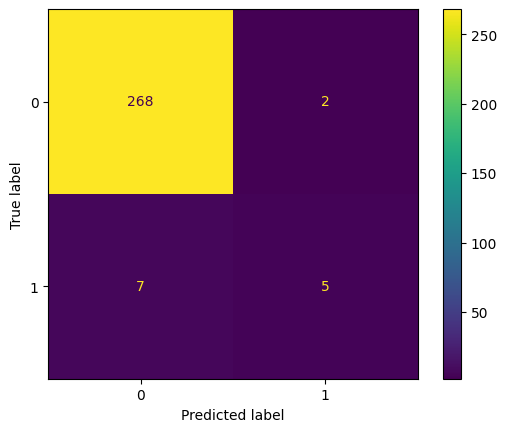

In [20]:
finaleval_actual = finaleval[['target']]
finaleval_x = finaleval.drop(columns=['target'])
output = predicting(finaleval_x=finaleval_x, cut=0.1)
output['Actual'] = finaleval_actual.values
mat = confusion_matrix(output['Actual'] , output['Predicted'] )
model = joblib.load('supervised_1')
disp = ConfusionMatrixDisplay(confusion_matrix=mat, display_labels=model.classes_)
disp.plot()
plt.show()